### Parcialito 3 - Federico del Mazo - 100029

#### Ejercicio 1

In [1]:
jurado1 = ['B', 'C', 'D', 'A']
jurado2 = ['C', 'D', 'A', 'B']
jurado3 = ['D', 'A', 'B', 'C']

orden = ['A', 'B', 'C', 'D']

In [2]:
def versus(jurados, a, b):
    puntos = sum([jurado.index(a) < jurado.index(b) for jurado in jurados])
    ganador = a if puntos >= len(jurados) / 2 else b
    victorias = puntos if ganador == a else len(jurados)-puntos
    print(f"{a} vs {b} => gana {ganador} con {victorias}/{len(jurados)}")
    return ganador

def eliminaciones_sucesivas(jurados, orden):
    cancha = orden[0] # porque el ganador queda en cancha
                      # se entiende?
                      # jaja
    for candidato in orden:
        if candidato == cancha:
            continue
        cancha = versus(jurados, cancha, candidato)
    return cancha
        
g = eliminaciones_sucesivas([jurado1, jurado2, jurado3], orden)
print()
print(f"Por eliminaciones sucesivas gana => {g}")

A vs B => gana A con 2/3
A vs C => gana C con 2/3
C vs D => gana C con 2/3

Por eliminaciones sucesivas gana => C


In [3]:
def borda_rule(jurados, candidatos):
    pt = []
    for candidato in candidatos:
        puntos = sum([list(reversed(jurado)).index(candidato) for jurado in jurados])
        print(f"{candidato} tiene {puntos} puntos")
        pt.append((puntos, candidato))
    return max(pt)[1]
        
g = borda_rule([jurado1, jurado2, jurado3], orden)
print()
print(f"Por Borda rule gana => {g}")

A tiene 3 puntos
B tiene 4 puntos
C tiene 5 puntos
D tiene 6 puntos

Por Borda rule gana => D


Bueno, corrompamos esto. Mantengamos la idea de hacer eliminaciones sucesivas, pero pensemos en otro orden. Si nos fijamos, A le gana a B, y B le gana a D, y D le gana a C. Es solo cuestión de hacer en el orden correcto la votación para que se vayan eliminando los que le podrían ganar a A, antes de que aparezca A!

In [4]:
eliminaciones_sucesivas([jurado1, jurado2, jurado3], ['C', 'D', 'B', 'A'])

C vs D => gana C con 2/3
C vs B => gana B con 2/3
B vs A => gana A con 2/3


'A'

**Cuál es el problema?** Todos los jurados prefieren a D por sobre A. A es Pareto-dominado por D. 

**Qué nos gustaría tener en este sistema?** Un ganador de Conicet!

#### Ejercicio 2

En el caso de que la tecnología es mala, no veo manera en la que se genere una cascada de aceptación de la tecnología. Si yo soy el nodo 0 (no tengo ganancia previa para chusmear), puedo desempatar tomando la decision de aceptar la tecnología, haciendo que la ganancia de todo el grafo sea negativa, y que el nodo 1 vea esto y decida rechazar la tecnología. Alternativamente, puedo decidir mantener el status quo, rechazar la tecnología, seguir con ganancia 0 para todos, y patearle esta misma decisión al que viene. De la misma forma, si yo soy el nodo N, y veo que el promedio de ganancias de los N-1 nodos anteriores a mi es negativa, no voy decidir mantener eso! voy a querer rechazar!

En el caso de que la tecnología es buena, la única forma en la que se genere una cascada de rechazos es si en todas las iteraciones se decide rechazar, pero una vez que uno acepte la tecnología la cascada va a comenzar y no va a frenar. Esto es porque si yo soy el nodo 0, el desempate proviene de aceptar la tecnología y pasar a tener ganancia positiva promedio en todo el grafo. El siguiente nodo a mí puede rechazar la tecnología y mantener el promedio positivo (aunque un poco mas bajo) o reforzar la cascada y decidir aceptar la tecnología.

#### Ejercicio 3

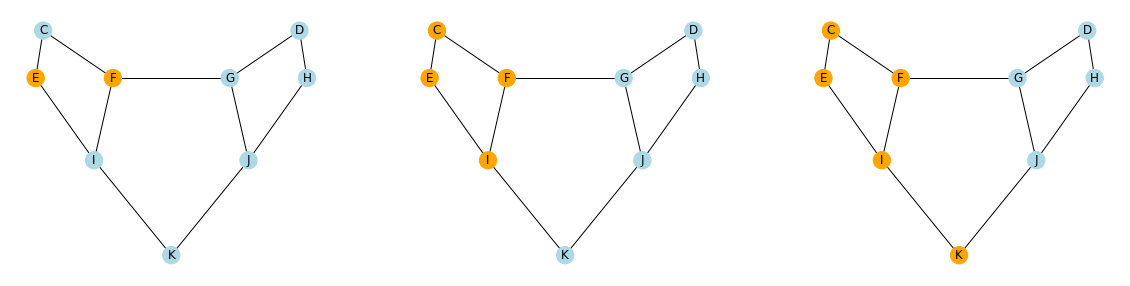

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation

diffusion_G = nx.Graph()
diffusion_G.add_nodes_from(['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
diffusion_G.add_edges_from([('C', 'E'), ('C', 'F'), ('D', 'G'), ('D', 'H'),
                            ('E', 'I'), ('F', 'I'), ('F', 'G'), ('G', 'J'),
                            ('H', 'J'), ('I', 'K'), ('K', 'J')])

# Vamos a usar el atributo Active para referirnos a que el comportamiento paso de 'B' a 'A'
#   active undefined ==> B ==> Celeste
#   active = true    ==> A ==> Naranja

# E y F son early adopters
diffusion_G.nodes['E']['active'] = True
diffusion_G.nodes['F']['active'] = True

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax = axes.flatten()

def update(old_G):
    G = old_G.copy()
    to_activate = [] # We want to update all nodes in batch instead of in place, 
                     # to simulate a whole new step in the diffusion
    for n in G.nodes:
        neighbors = list(nx.neighbors(G, n))
        active_neighbors = [n for n in neighbors if G.nodes[n].get('active')]
        if len(active_neighbors) >= (len(neighbors) / 2): 
            to_activate.append(n)
    for n in to_activate:
        G.nodes[n]['active'] = True
    return G
    
def draw(G, ax):
    node_color=['orange' if n[1] else 'lightblue' for n in G.nodes.data('active')]
    nx.draw_networkx(G, node_color=node_color, pos=nx.spectral_layout(G), ax=ax)

i = 0
while True:
    draw(diffusion_G, ax[i])    
    ax[i].set_axis_off()
    next_G = update(diffusion_G)
    if next_G.nodes(data=True) == diffusion_G.nodes(data=True):
        break
    diffusion_G = next_G
    i += 1

plt.show()

El comportamiento A no se propaga a través de toda la red porque ésta consiste de dos componentes fuertemente conectados (C-E-F-I y D-G-H-J), que entre sí se conectan a través del puente F-G y del nodo K.

Como tenemos a los early adopters solo en uno de estos componentes, 'romper la barrera' y llegar a propagar un comportamiento al otro se nos hace imposible.

Con tener un early adopter en cualquiera de los 4 nodos que al final de la simulación anterior seguían con el comportamiento B (es decir, un early adopter en cualquier nodo del _otro_ componente de la red), llegaríamos a propagar el comportamiento por todos lados.

#### Ejercicio 4

In [6]:
# Robando código del ejercicio 5 del parcialito 1...
import math

def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

n_nodes = 1000
n_edges = 5500

total_possible_edges = nCr(n_nodes, 2)
erdos = nx.erdos_renyi_graph(n_nodes, n_edges / total_possible_edges)
barabara = nx.barabasi_albert_graph(n_nodes, n_edges // n_nodes)

grafos = {
    "Erdös-Rényi": erdos,
    "Barabási-Albert": barabara # preferential attachment model!
}

for k,v in grafos.items():
    print(f"{k}: {v}")

Erdös-Rényi: Graph with 1000 nodes and 5568 edges
Barabási-Albert: Graph with 1000 nodes and 4975 edges


In [7]:
# https://ndlib.readthedocs.io/en/latest/tutorial.html
# https://ndlib.readthedocs.io/en/latest/reference/models/dynamics/dSIR.html
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import random
from tqdm import tqdm

def sir(g, initial_node):
    model = ep.SIRModel(erdos)
    cfg = mc.Configuration()
    # Los parametros los pongo medio a ojo, no quiero ni una clara epidemia, ni tampoco que sea imposible de obtener
    cfg.add_model_parameter('beta',  0.035)
    cfg.add_model_parameter('gamma', 0.10)
    cfg.add_model_initial_configuration("Infected", [initial_node])
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(50)
    trends = model.build_trends(iterations)
    status_map = model.get_status_map()
    
    # Consideramos una epidemia si, en algun momento de toda la historia, tuvimos >= 30% de infectados
    infected_in_time = map(lambda i: i['node_count'][status_map['Infected']], iterations)
    is_epidemic = any([infected >= g.number_of_nodes()/3 for infected in infected_in_time])
    return model, trends, is_epidemic

erdosepidemics = 0
barabaraepidemics = 0
for i in tqdm(range(100)):
    random_erdos = random.choice(list(erdos.nodes()))
    model, trends, is_epidemic = sir(erdos, random_erdos)
    erdosepidemics+=is_epidemic
    
    random_barabara = random.choice(list(barabara.nodes()))
    model, trends, is_epidemic = sir(barabara, random_barabara)
    barabaraepidemics+=is_epidemic

print(f"Erdös-Rényi: en 100 ejecuciones, {erdosepidemics} tuvieron una epidemia")
print(f"Barabási-Albert: En 100 ejecuciones, {barabaraepidemics} tuvieron una epidemia")

100%|████████████████████████████████████████████| 100/100 [00:14<00:00,  6.75it/s]

Erdös-Rényi: en 100 ejecuciones, 65 tuvieron una epidemia
Barabási-Albert: En 100 ejecuciones, 62 tuvieron una epidemia


En mis simulaciones intente generar un modelo donde la epidemia no sea inevitable, teniendo una red no extremadamente grande ni conectada, y teniendo una tasa de nacimiento baja (junto a una taza de mortalidad del virus relativamente alta).

De todas formas, sean los parametros que sea que use, siempre llego a números bastante similares! Sin ninguna diferencia significativa entre sí. Esto se puede explicar con que, en grafos con una gran cantidad de nodos (y tomando como infectado inicial a un nodo al azar), no son tan distintas las posibles epidemias de un grafo aleatorio que de uno que cumple la ley de potencias. 

En Erdös-Rényi todos los nodos tendrán una probabilidad parecida de contagiar a sus vecinos, porque todos tienen en promedio un grado similar, y entonces con el solo correr el tiempo, en una red grande, eventualmente una epidemia aparecerá.

Por otro lado, en Barabási-Albert tenemos pocos nodos con muchos vecinos y muchos nodos con pocos vecinos. Entonces, lo que nos importa es llegar a infectar aunque sea a alguno de los nodos con muchos vecinos, y luego la epidemia se encargará sola de seguir propagandose. Esto, en una red grande y con una tasa de mortalidad del virus no muy alta, eventualmente sucederá.

La conclusión de esto es que entre un modelo azaroso y un modelo que cumple la ley de potencias, la mayor diferencia es si en el segundo caso se llegó a contagiar o no el subset de nodos que tiene muchos vecinos. Si eso pasó, entonces los desarrollos de los viruses se parecerán bastante.

In [8]:
from tqdm import tqdm

erdosepidemics = 0
barabaraepidemics = 0
max_erdos = max(erdos.degree(), key=lambda x: x[1])[1]
max_barabara = max(barabara.degree(), key=lambda x: x[1])[1]
for i in tqdm(range(100)):
    model, trends, is_epidemic = sir(erdos, max_erdos)
    erdosepidemics+=is_epidemic
    
    model, trends, is_epidemic = sir(barabara, max_barabara)
    barabaraepidemics+=is_epidemic

print(f"Erdös-Rényi: en 100 ejecuciones, {erdosepidemics} tuvieron una epidemia")
print(f"Barabási-Albert: En 100 ejecuciones, {barabaraepidemics} tuvieron una epidemia")

100%|████████████████████████████████████████████| 100/100 [00:16<00:00,  6.14it/s]

Erdös-Rényi: en 100 ejecuciones, 74 tuvieron una epidemia
Barabási-Albert: En 100 ejecuciones, 68 tuvieron una epidemia


En cambio, comenzando la simulación con un nodo en particular infectado (el de mayor grado), vemos que si se pueden afectar los números de epidemia. Hay un incremento de epidemias generadas, ya que la propagación empezo mucho mas fuerte desde el tiempo 0.

Por último, para pensar en cómo la existencia de comunidades en un grafo afectará al modelo SIR, podemos intentar imaginar el ejercicio 3 de este parcialito, en una escala (muchísimo) mayor.

Lo que vimos, por ejemplo con el COVID, es algo que suena bastante obvio. Las comunidades se infectan entre sí de manera muy rápida (pensar en una ciudad altamente poblada) mientras que hay pocos puentes entre comunidades (vuelos entre paises, por ejemplo), los cuales llevan el virus de un lado a otro. Una vez que se penetra una comunidad con el virus, de infectar un nodo con un gran grado (llegar al aeropuerto...) el SIR se encargará de infectar a la nueva comunidad que ingreso.

#### Ejercicio 5

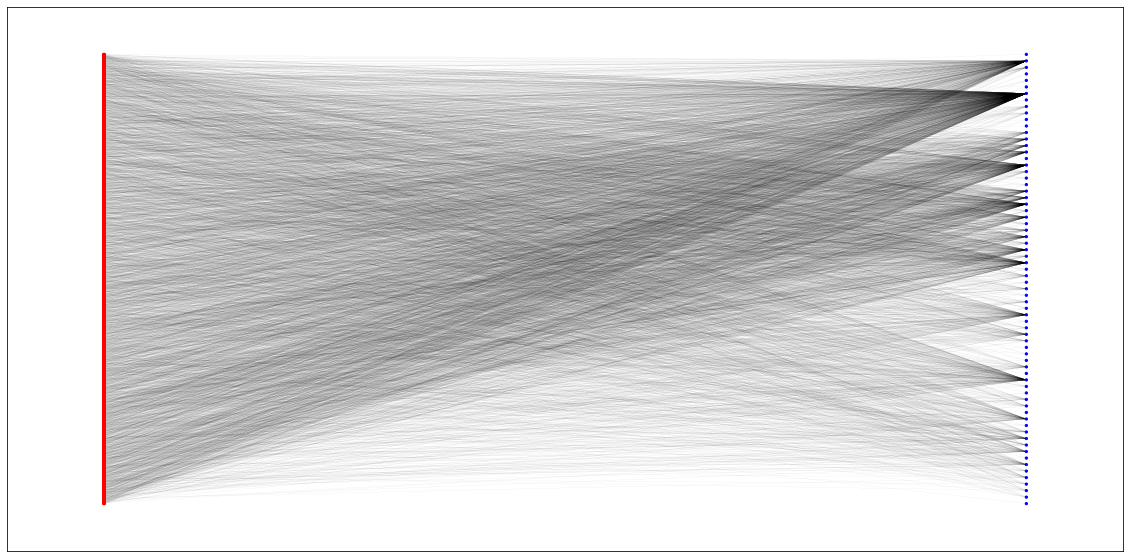

In [9]:
import pandas as pd
from networkx.algorithms import bipartite


def create_bipartite(file):
    df = pd.read_csv(file, header=0, names=["user", "product", "weight", "_timestamp"])
    df['user'] = 'u_' + df['user'].astype(str)
    df['product'] = 'p_' + df['product'].astype(str)

    G = nx.Graph()
    G.add_nodes_from(df['user'], bipartite=0, color='red')
    G.add_nodes_from(df['product'], bipartite=1, color='blue')
    G.add_weighted_edges_from(list(df[['user','product','weight']].to_records(index=False)))

    # Our df may be disconnected (at least when working with a sample)
    # let's keep the biggest bipartite graph we can get
    G.remove_nodes_from(G.nodes - max(nx.connected_components(G), key=len))
    
    return G


# Before working on the full dataset, let's draw a sample of what we are building
# (At least to show we are working with a bipartite graph!)
G_sample = create_bipartite(f'./data/ratings-electronics-sample.csv')
plt.figure(figsize=(20,10))
nx.draw_networkx(G_sample,
                 node_size=5,
                 node_color=[n[1] for n in G_sample.nodes.data('color')],
                 width=0.02, 
                 pos=nx.bipartite_layout(G_sample, nx.bipartite.sets(G_sample)[0]),
                 with_labels=False)

In [10]:
network_name = 'ratings-electronics-full'
# G = nx.read_gpickle(f'./data/{network_name}_network.pkl')
G = create_bipartite(f'./data/{network_name}.csv')
print(G)

# We pickle it for rev2
nx.write_gpickle(G, f"./data/{network_name}_network.pkl")

Graph with 4523295 nodes and 7734581 edges


In [20]:
# https://github.com/horizonly/Rev2-model
# Modificado fuertemente (leer el diff del archivo!)

# Como es un script y no un módulo, tengo que usar un subprocess...
import subprocess

# El paper utiliza otro set de parametros (2 alphas, 2 betas, 3 gammas)
# Hago la corrida lo mas parecida a lo aprendido en clase, aunque no va a ser una traducción 1:1
# python rev2code.py [network_name] [a1] [a2] [b1] [b2] [r1] [r2] [r3]
subprocess.call(['python3', './rev2code.py', network_name, '1', '1', '1', '1', '1', '1', '0'])

Loading ratings-electronics-full network
ratings-electronics-full network has 4523295 nodes and 7734581 edges
-----------------
Epoch number 0 with du = 0.000000, dp = 0.000000, dr = 0.000000, for (1,1,1,1,1,1,0)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 1 with du = 1262086.291608, dp = 0.000000, dr = 5831642.500000, for (1,1,1,1,1,1,0)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 2 with du = 491150.867516, dp = 33944.333333, dr = 524240.373107, for (1,1,1,1,1,1,0)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 3 with du = 179560.743435, dp = 19657.388408, dr = 184461.187417, for (1,1,1,1,1,1,0)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 4 with du = 62629.289158, dp = 9712.036849, dr = 67025.190713, for 

0

In [21]:
# Let's load our results back and show some node/edge samples
G = nx.read_gpickle(f"./results/{network_name}_network.pkl")
print(G)
print()
for u in list(nx.bipartite.sets(G)[0])[:3]:
    print(u, G.nodes(data=True)[u])
print()
for p in list(nx.bipartite.sets(G)[1])[:3]:
    print(p, G.nodes(data=True)[p])
print()
for e in list(G.edges(data=True))[:3]:
    print(e)

Graph with 4523295 nodes and 7734581 edges

u_A2PRNJARWTKNF8 {'bipartite': 0, 'color': 'red', 'fairness': 0.5}
u_AKZA1HHJI24IS {'bipartite': 0, 'color': 'red', 'fairness': 0.3}
u_A16NQ80HXH4XSB {'bipartite': 0, 'color': 'red', 'fairness': 0.3}

p_B00AAC9XR4 {'bipartite': 1, 'color': 'blue', 'goodness': 0.7952255408087132}
p_B006TOISSC {'bipartite': 1, 'color': 'blue', 'goodness': 0.6023166037061238}
p_B0019447AA {'bipartite': 1, 'color': 'blue', 'goodness': 0.8914628932470046}

('u_A2CX7LUOHB2NDG', 'p_0321732944', {'weight': 5.0, 'fairness': 0.0})
('u_A2CX7LUOHB2NDG', 'p_B000W3LJ6Y', {'weight': 5.0, 'fairness': 0.0})
('u_A2CX7LUOHB2NDG', 'p_B001EYU79A', {'weight': 5.0, 'fairness': 0.0})


In [23]:
def filter_users(n_reviews, fairness_fn):
    user_nodes = nx.bipartite.sets(G)[0]
    users_with_n_reviews = filter(lambda n: G.degree[n] >= n_reviews, user_nodes)
    users = filter(lambda n: fairness_fn(G.nodes(data=True)[n]['fairness']), users_with_n_reviews)
    return list(users)

maliciosos = filter_users(5, lambda x: x <= 0.2)
print(f"Hay {len(maliciosos)} ({round(len(maliciosos)/len(G) * 100, 2)}%) usuarios maliciosos, entre ellos: {maliciosos[:3]}")
      
extremadamente_justos = filter_users(10, lambda x: x >= 0.9)
print(f"Hay {len(extremadamente_justos)} ({round(len(extremadamente_justos)/len(G) * 100, 2)}%) usuarios extremadamente justos, entre ellos: {extremadamente_justos[:3]}")

Hay 111894 (2.47%) usuarios maliciosos, entre ellos: ['u_A3Q0UCHM8DSDG7', 'u_A1ES6SAOUC2ZGK', 'u_A3F9P2RCBU4NK']
Hay 6 (0.0%) usuarios extremadamente justos, entre ellos: ['u_AG3PX0SR2948A', 'u_A1G1AFIMEVETKK', 'u_A2TCHRBAIPU5G3']
